## EDA New York Times

In [1]:
import pandas as pd
df = pd.read_csv('./nyt-frame.csv', header = 0)
data = df.iloc[:,9:]
array = data.values
array.shape

(102, 4424)

In [2]:
df.head(2)

,Unnamed: 0,class.labels,X.,X.d,X.nd,X.s,X.th,X.this,a,abandoned,...,yorkers,yorks,you,young,younger,your,youre,youth,youthful,yu
0,1,art,0.008707,0.0,0.0,0.0,0.009251,0.0,0.007564,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,art,0.005848,0.0,0.0,0.0,0.000000,0.0,0.001418,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
labels = df.iloc[:, 1]
labels

0        art
1        art
2        art
3        art
4        art
       ...  
97     music
98     music
99     music
100    music
101    music
Name: class.labels, Length: 102, dtype: object

In [4]:
import numpy as np
header = list(df.columns.values[9:])
sample_word = np.random.choice(header, 20, replace=False)
print(sample_word)

['static' 'edges' 'darkened' 'counter' 'venus' 'creatures' 'dolphin'
 'hands' 'writes' 'concerts' 'jaunty' 'avoid' 'matinee' 'science' 'orange'
 'dog' 'talent' 'football' 'mentions' 'bronzes']


In [5]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(array)

In [6]:
pca.components_.shape

(102, 4424)

In [7]:
word_with_first_component = zip(header, pca.components_[0])
word_with_first_component = sorted(word_with_first_component, key=lambda x: x[1], reverse=True)

word_with_first_component[:15]

[('she', 0.2612739189053151),
 ('her', 0.24529311441720594),
 ('ms', 0.20211292705699688),
 ('i', 0.15028278883843335),
 ('said', 0.1336055676362531),
 ('mother', 0.10687219119361728),
 ('cooper', 0.1030093920502289),
 ('my', 0.0943252121195823),
 ('painting', 0.08788709841748941),
 ('process', 0.07119630147343918),
 ('paintings', 0.06988483529500196),
 ('im', 0.06857385461154218),
 ('mrs', 0.06562096808145743),
 ('he', 0.06531001248089248),
 ('me', 0.06379278250161463)]

In [8]:
word_with_first_component[-15:]

[('symphony', -0.044930776254680505),
 ('jersey', -0.04603235412282297),
 ('y', -0.047911748359542726),
 ('east', -0.047940868937490964),
 ('festival', -0.04812333139017824),
 ('players', -0.04881882614499726),
 ('program', -0.049001383290293736),
 ('m', -0.0490254522708059),
 ('theaters', -0.051177961569890386),
 ('opera', -0.05555364096730111),
 ('composers', -0.05859060967058648),
 ('orchestra', -0.06926899826753334),
 ('theater', -0.07404600988801406),
 ('trio', -0.08780731643381659),
 ('music', -0.11211617341838426)]

In [9]:
word_with_second_component = zip(header, pca.components_[1])
word_with_second_component = sorted(word_with_second_component, key=lambda x: x[1], reverse=True)

word_with_second_component[:15]

[('her', 0.22078475821587362),
 ('she', 0.21307376342525308),
 ('theater', 0.16239059851001328),
 ('opera', 0.12992637535456897),
 ('ms', 0.12447032686713282),
 ('i', 0.08120155281056664),
 ('hour', 0.0807586538130769),
 ('sang', 0.07465343667556083),
 ('production', 0.07415772534187763),
 ('festival', 0.07300940791699406),
 ('music', 0.07234461523901513),
 ('musical', 0.0707081787303945),
 ('songs', 0.06923167953630319),
 ('orchestra', 0.06760285785600785),
 ('vocal', 0.06758794058200336)]

In [10]:
word_with_second_component[-15:]

[('service', -0.04666421975711614),
 ('white', -0.04966737533217018),
 ('painted', -0.05013831346292888),
 ('sculptures', -0.05147913929381105),
 ('gallery', -0.0551592888306786),
 ('sculpture', -0.06035313871840532),
 ('paintings', -0.06564345120814782),
 ('tax', -0.07226860058901599),
 ('painting', -0.07401963974238186),
 ('museums', -0.07539497668344274),
 ('donations', -0.07765780277980347),
 ('artists', -0.09263497758879531),
 ('images', -0.09522680440744577),
 ('museum', -0.12089946277617654),
 ('art', -0.15431673143840383)]

COMMENT:
Pierwszy komponent zdaje się nie nieść dużo informacji o tematyce artykuł
Ewidentnie widzimy, że dla drugiego komponentu pozytywnie skorelowane są z nim słowa związane z muzyką, a negatywnie słowa związane ze sztuką.

In [11]:
reds = labels == 'art'
blues = labels == 'music'

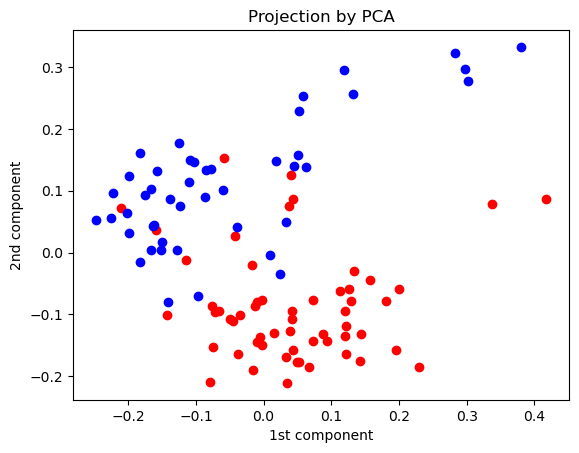

In [12]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X_pca[np.array(reds), 0], X_pca[np.array(reds), 1], c="red")
plt.scatter(X_pca[np.array(blues), 0], X_pca[np.array(blues), 1], c="blue")
plt.title("Projection by PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

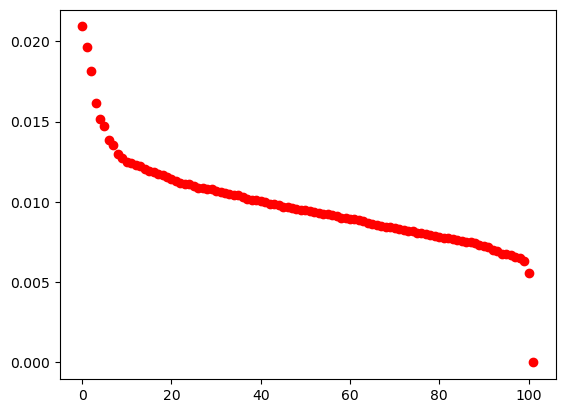

0.1577347802900349


In [13]:
variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, 'ro')
plt.show()
print(sum(variance_ratio[0:10]))

COMMENT:
Widzimy, że cechy wyjaśniają mniej więcej tyle samo, PCA nie jest tutaj więc niesamowicie efektywne w np. wyborze cech nieistotnych, moglibyśmy odrzucić zaledwie 1 cechę jako nieistotną. Pierwsze 10 cech wyjaśnia 15% wariancji co oznacza, że jest ona rozłożona po wielu cechach.

## EDA Cars

In [14]:
df = pd.read_csv('./04cars-data.csv', header = 0)
data = df.iloc[:,-11:]
array = data.values
array.shape

(387, 11)

In [15]:
features_names = df.columns[-11:]
features_names

Index(['Retail Price', 'Dealer Cost', 'Engine Size (l)', 'Cyl', 'HP',
       'City MPG', 'Hwy MPG', 'Weight', 'Wheel Base', 'Len', 'Width'],
      dtype='object')

In [16]:
from sklearn.discriminant_analysis import StandardScaler

scaler = StandardScaler()
normal_array = scaler.fit_transform(array)
np.mean(normal_array[:, 0]), np.std(normal_array[:, 0])

(-4.131062417209885e-17, 1.0)

In [17]:
pca = PCA()
X_pca = pca.fit_transform(normal_array)

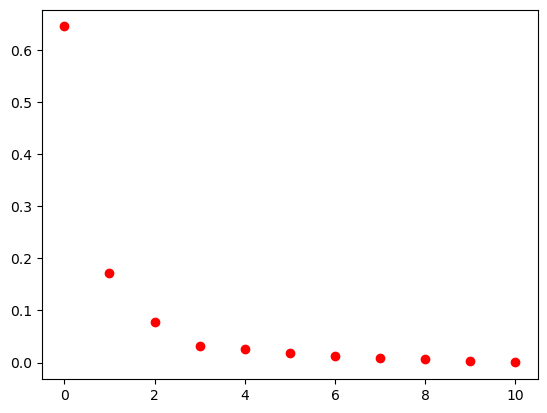

In [18]:
variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, 'ro')
plt.show()

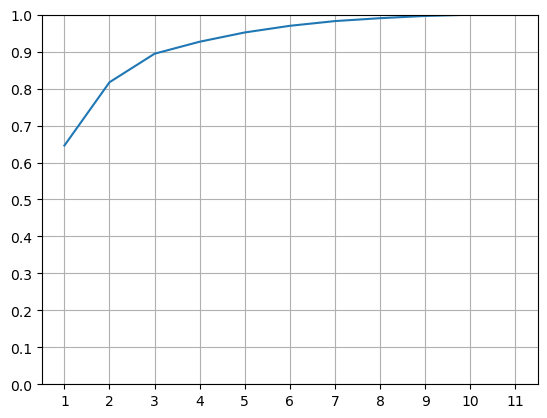

In [19]:
cumsum_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, 12),cumsum_variance_ratio)
plt.ylim(0, 1)
plt.grid()
plt.xticks(range(1, 12))
plt.yticks(np.linspace(0, 1, 11))
plt.show()

COMMENT:
Widzimy, że już kilka pierwszych principal components wyjaśnia większość wariancji, jeśli musielibyśmy to moglibyśmy łatwo zredukować liczbę cech.

In [20]:
pca.components_.shape

(11, 11)

In [21]:
first_component = list(zip(features_names, pca.components_[0]))
first_component

[('Retail Price', -0.2637504434440343),
 ('Dealer Cost', -0.2623186387530949),
 ('Engine Size (l)', -0.3470804920252009),
 ('Cyl', -0.33418875762863715),
 ('HP', -0.3186022584840293),
 ('City MPG', 0.3104817267323128),
 ('Hwy MPG', 0.30658863858044433),
 ('Weight', -0.336329366940488),
 ('Wheel Base', -0.2662100335710544),
 ('Len', -0.2567901876706823),
 ('Width', -0.29605459141706114)]

In [22]:
second_component = list(zip(features_names, pca.components_[1]))
second_component

[('Retail Price', 0.46850869750253876),
 ('Dealer Cost', 0.47014658513822577),
 ('Engine Size (l)', -0.015347186463713367),
 ('Cyl', 0.07803201087501883),
 ('HP', 0.29221347613918247),
 ('City MPG', -0.003365935761659622),
 ('Hwy MPG', -0.010964460145349025),
 ('Weight', -0.16746357154787023),
 ('Wheel Base', -0.4181771069592044),
 ('Len', -0.4084113806687549),
 ('Width', -0.31289135016250724)]

W pierwszym komponencie nie widzimy cech bliskich zeru, oznacza to, że jest on jakąś kombinacją wszystkich cech.
W drugim komponencie Engine Size jest bliski zeru, co oznacza, że ten komponent nie 

In [23]:
features_with_pc = list(zip(features_names, pca.components_[0], pca.components_[1]))
features_with_pc

[('Retail Price', -0.2637504434440343, 0.46850869750253876),
 ('Dealer Cost', -0.2623186387530949, 0.47014658513822577),
 ('Engine Size (l)', -0.3470804920252009, -0.015347186463713367),
 ('Cyl', -0.33418875762863715, 0.07803201087501883),
 ('HP', -0.3186022584840293, 0.29221347613918247),
 ('City MPG', 0.3104817267323128, -0.003365935761659622),
 ('Hwy MPG', 0.30658863858044433, -0.010964460145349025),
 ('Weight', -0.336329366940488, -0.16746357154787023),
 ('Wheel Base', -0.2662100335710544, -0.4181771069592044),
 ('Len', -0.2567901876706823, -0.4084113806687549),
 ('Width', -0.29605459141706114, -0.31289135016250724)]

In [24]:
X_pca

array([[-1.56744306, -0.44727246,  0.28738865, ...,  0.22058269,
         0.20359302,  0.04829302],
       [-1.63564834, -0.33973195,  0.3456878 , ...,  0.2352994 ,
         0.20416675,  0.05047295],
       [-1.90661858, -0.4111386 , -0.55269583, ..., -0.43282499,
        -0.12310753, -0.00328847],
       ...,
       [ 2.34851831,  0.40942918, -0.35415633, ..., -0.07685297,
         0.14907408, -0.01951368],
       [-0.06112437, -0.30760341,  0.01818509, ..., -0.22484254,
        -0.07345393, -0.03462459],
       [-2.3112525 , -0.40703335, -0.78547017, ..., -0.57213414,
        -0.00874759, -0.04113497]])

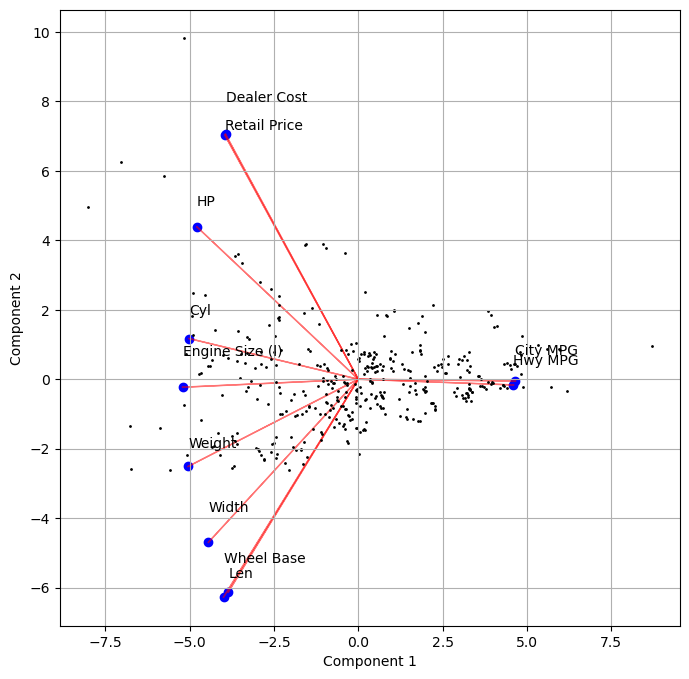

In [25]:
plt.figure(figsize=(8, 8))
plt.scatter(15 * pca.components_[0], 15 * pca.components_[1], color='b')

for i, feature in enumerate(features_names):
    plt.arrow(0, 0, 15 * pca.components_[0][i], 15 * pca.components_[1][i], color='r', alpha=0.5, width=0.005)
    plt.text(15 * pca.components_[0][i], 15 * pca.components_[1][i] + np.random.uniform(0, 1), feature, fontsize=10, ha='left')


plt.scatter(X_pca[:, 0], X_pca[:, 1], c="black", s=1)

# Set labels and title
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Show plot
plt.grid(True)
plt.show()

COMMENT:
Widzimy, że dane zdecydowanie układają się wzdłuż osi, z którą koreluje najwięcej cech (na rysunku blisko poziome)

## Eigenfaces

In [26]:
from sklearn.datasets import fetch_lfw_people
dataset = fetch_lfw_people(min_faces_per_person=50)

In [27]:
from sklearn.model_selection import train_test_split

X, y= dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [28]:
pca = PCA(n_components=100)
X_train_PCA = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [29]:
from sklearn import svm
clf_svm = svm.SVC(kernel='rbf')
clf_svm.fit(X_train_PCA, y_train)

SVC()

In [30]:
from sklearn.model_selection import cross_val_score

precision = cross_val_score(clf_svm, X_test_pca, y_test, cv=5, scoring='precision_macro')
recall = cross_val_score(clf_svm, X_test_pca, y_test, cv=5, scoring='recall_macro')
f1_score = cross_val_score(clf_svm, X_test_pca, y_test, cv=5, scoring='f1_macro')

/home/przemek/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/przemek/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/przemek/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/przemek/anaconda3/lib/python3.10/site-packages/sklearn/met

In [31]:
print(
    f"Średnia precyzja: {np.mean(precision)},\nŚredni recall: {np.mean(recall)},\nŚrednie f1: {np.mean(f1_score)}"
)

Średnia precyzja: 0.33194517670549856,
Średni recall: 0.25984743265993265,
Średnie f1: 0.25799498907758084


In [32]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier()
clf_mlp = clf_mlp.fit(X_train_PCA, y_train)

precision = cross_val_score(clf_mlp, X_test_pca, y_test, cv=5, scoring='precision_macro')
recall = cross_val_score(clf_mlp, X_test_pca, y_test, cv=5, scoring='recall_macro')
f1_score = cross_val_score(clf_mlp, X_test_pca, y_test, cv=5, scoring='f1_macro')

print(
    f"Średnia precyzja: {np.mean(precision)},\nŚredni recall: {np.mean(recall)},\nŚrednie f1: {np.mean(f1_score)}"
)

/home/przemek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/przemek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/przemek/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/przemek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization h

Średnia precyzja: 0.6156631792699905,
Średni recall: 0.5690349927849927,
Średnie f1: 0.5840561001380995


/home/przemek/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Scree plot:

In [33]:
n_components = [10 * k for k in range(1, 21)]

svm_results = []
mlp_results = []

for n in n_components:
    pca = PCA(n_components=n)
    X_train_PCA = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    #svm
    clf_svm = svm.SVC(kernel='rbf')
    clf_svm.fit(X_train_PCA, y_train)

    precision = np.mean(cross_val_score(clf_svm, X_test_pca, y_test, cv=5, scoring='precision_macro'))
    recall = np.mean(cross_val_score(clf_svm, X_test_pca, y_test, cv=5, scoring='recall_macro'))
    f1_score = np.mean(cross_val_score(clf_svm, X_test_pca, y_test, cv=5, scoring='f1_macro'))

    svm_results.append((precision, recall, f1_score))

    #mlp
    clf_mlp = MLPClassifier()
    clf_mlp = clf_mlp.fit(X_train_PCA, y_train)

    precision = np.mean(cross_val_score(clf_mlp, X_test_pca, y_test, cv=5, scoring='precision_macro'))
    recall = np.mean(cross_val_score(clf_mlp, X_test_pca, y_test, cv=5, scoring='recall_macro'))
    f1_score = np.mean(cross_val_score(clf_mlp, X_test_pca, y_test, cv=5, scoring='f1_macro'))

    mlp_results.append((precision, recall, f1_score))

/home/przemek/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/przemek/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/przemek/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/przemek/anaconda3/lib/python3.10/site-packages/sklearn/met

In [37]:
svm_results = np.array(svm_results)
mlp_results = np.array(mlp_results)

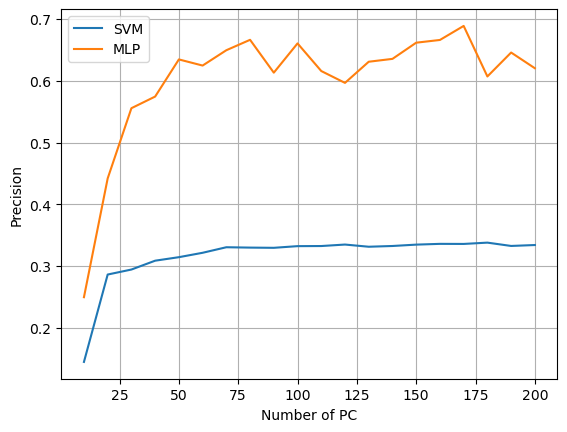

In [39]:
plt.plot(n_components, svm_results[:, 0], label='SVM')
plt.plot(n_components, mlp_results[:, 0], label='MLP')

plt.xlabel('Number of PC')
plt.ylabel('Precision')

plt.grid(True)
plt.legend()
plt.show()

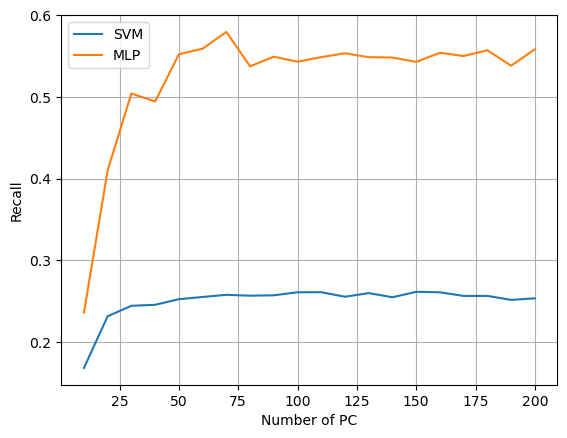

In [43]:
plt.plot(n_components, svm_results[:, 1], label='SVM')
plt.plot(n_components, mlp_results[:, 1], label='MLP')

plt.xlabel('Number of PC')
plt.ylabel('Recall')

# Show plot
plt.grid(True)
plt.legend()
plt.show()

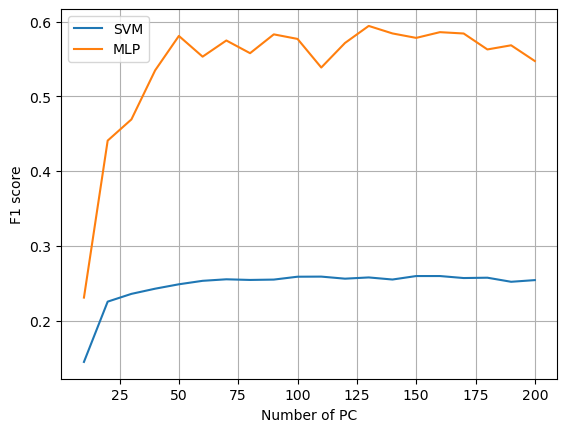

In [42]:
plt.plot(n_components, svm_results[:, 2], label='SVM')
plt.plot(n_components, mlp_results[:, 2], label='MLP')

plt.xlabel('Number of PC')
plt.ylabel('F1 score')

# Show plot
plt.grid(True)
plt.legend()
plt.show()

COMMENT:
Jeśli bylibyśmy zmuszeni do użycia redukcji wymiarowości przy pomocy PCA, to optymalnym byłoby wybrać około 25 - 50 cech. Widzimy, że dokładanie kolejnych cech nie jest już w stanie poprawić wyników naszych klasyfikatorów. Może być to też słabym dobraniem ich do problemu, lub istotnością featerów o wysokiej częstotliwości.

Drawing filters:

In [ ]:
pca.components_[:20].shape, dataset.images[0].shape

((20, 2914), (62, 47))

In [ ]:
pc_as_img = [
    (np.reshape(pc, (62, 47)) - np.min(pc)) / (np.max(pc) - np.min(pc))
    for pc in pca.components_
][:20]

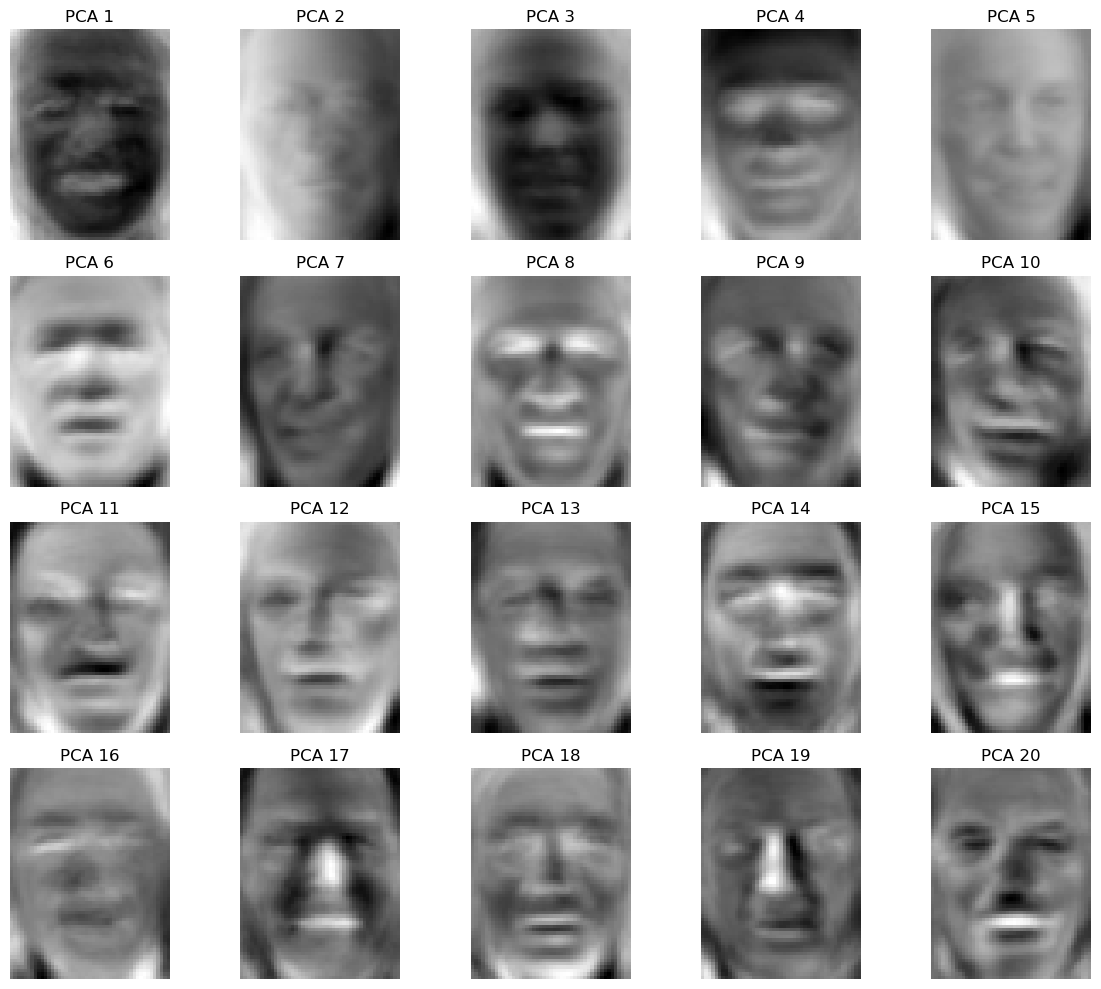

In [ ]:
fig, axs = plt.subplots(4, 5, figsize=(12, 10))

axs = axs.flatten()

for i, img in enumerate(pc_as_img):
    ax = axs[i]
    ax.imshow(img, cmap='gray') 
    ax.axis('off')
    ax.set_title(f'PCA {i+1}')  

plt.tight_layout()
plt.show()

Eigenfaces zachowują się ogólne cechy pozwalające na rozpoznawanie twarzy takie jak: owlany kształt, oczy, zarys nosa, zarys ust itd. Takie dobranie intensywności poszczególnych pixeli pozwoliło utworzyć takie filtry. Można uznać, że utworzyliśmy własny zbiór filtrów konwolucyjnych które powinny korelować ze zdjęciem, jeśli znajduje się na nim twarz. 

## Kernel PCA

In [51]:
from sklearn.decomposition import KernelPCA

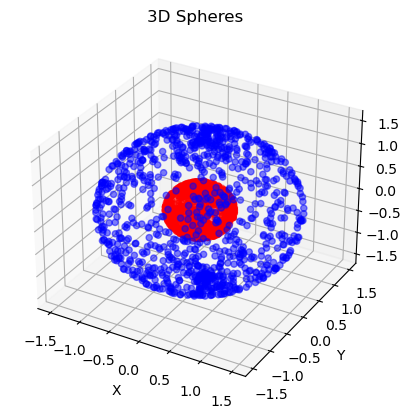

In [52]:
n_samples = 1000
noise = 0.1

def generate_sphere(radius, n_samples):
    phi = np.random.uniform(0, np.pi, n_samples)
    theta = np.random.uniform(0, 2*np.pi, n_samples)
    x = radius * np.sin(phi) * np.cos(theta)
    y = radius * np.sin(phi) * np.sin(theta)
    z = radius * np.cos(phi)
    return np.array([x, y, z]).T

sphere1 = generate_sphere(radius=1.5, n_samples=n_samples)
sphere2 = generate_sphere(radius=0.5, n_samples=n_samples)

X = np.vstack([sphere1, sphere2])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sphere1[:, 0], sphere1[:, 1], sphere1[:, 2], c='b', marker='o', alpha=0.5)
ax.scatter(sphere2[:, 0], sphere2[:, 1], sphere2[:, 2], c='r', marker='o', alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Spheres')
plt.show()

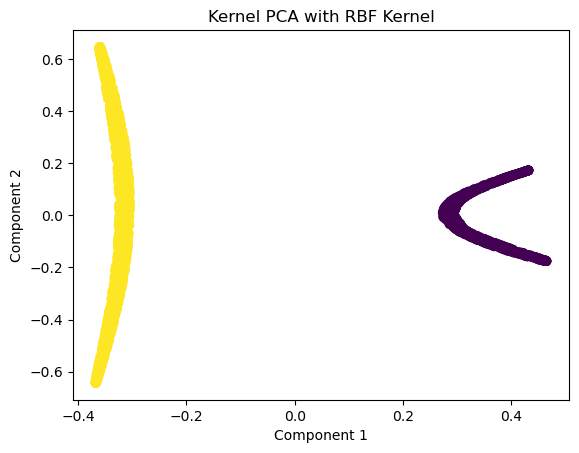

In [60]:
kpca_rbf = KernelPCA(kernel='rbf', gamma=2, n_components=2)
X_kpca_rbf = kpca_rbf.fit_transform(X)

plt.scatter(X_kpca_rbf[:, 0], X_kpca_rbf[:, 1], c=np.concatenate([np.zeros(n_samples), np.ones(n_samples)]))
plt.title("Kernel PCA with RBF Kernel")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

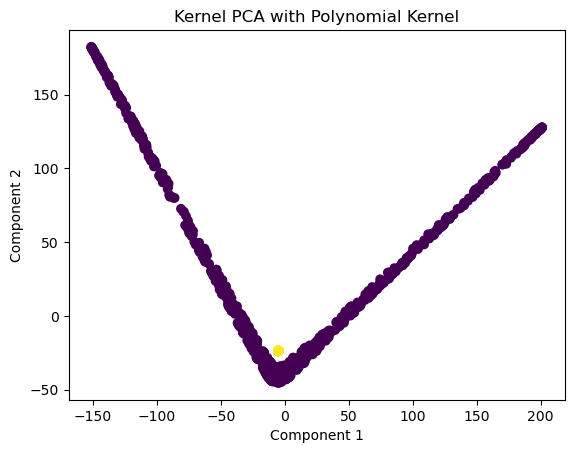

In [68]:
kpca_poly = KernelPCA(kernel='poly', degree=20, n_components=2)
X_kpca_poly = kpca_poly.fit_transform(X)

plt.scatter(X_kpca_poly[:, 0], X_kpca_poly[:, 1], c=np.concatenate([np.zeros(n_samples), np.ones(n_samples)]))
plt.title("Kernel PCA with Polynomial Kernel")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

Eksperyment się udał - KernelPCA pomaga rozdzielić takie proste nieliniowe zbiory danych.

## Back to eigenfaces

In [69]:
n_components = [10 * k for k in range(1, 21)]

svm_results = []
mlp_results = []

for n in n_components:
    pca = KernelPCA(n_components=n, kernel='poly', degree=20)
    X_train_PCA = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    #svm
    clf_svm = svm.SVC(kernel='rbf')
    clf_svm.fit(X_train_PCA, y_train)

    precision = np.mean(cross_val_score(clf_svm, X_test_pca, y_test, cv=5, scoring='precision_macro'))
    recall = np.mean(cross_val_score(clf_svm, X_test_pca, y_test, cv=5, scoring='recall_macro'))
    f1_score = np.mean(cross_val_score(clf_svm, X_test_pca, y_test, cv=5, scoring='f1_macro'))

    svm_results.append((precision, recall, f1_score))

    #mlp
    clf_mlp = MLPClassifier()
    clf_mlp = clf_mlp.fit(X_train_PCA, y_train)

    precision = np.mean(cross_val_score(clf_mlp, X_test_pca, y_test, cv=5, scoring='precision_macro'))
    recall = np.mean(cross_val_score(clf_mlp, X_test_pca, y_test, cv=5, scoring='recall_macro'))
    f1_score = np.mean(cross_val_score(clf_mlp, X_test_pca, y_test, cv=5, scoring='f1_macro'))

    mlp_results.append((precision, recall, f1_score))

/home/przemek/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/przemek/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/przemek/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/przemek/anaconda3/lib/python3.10/site-packages/sklearn/met

In [72]:
svm_results = np.array(svm_results)
mlp_results = np.array(mlp_results)

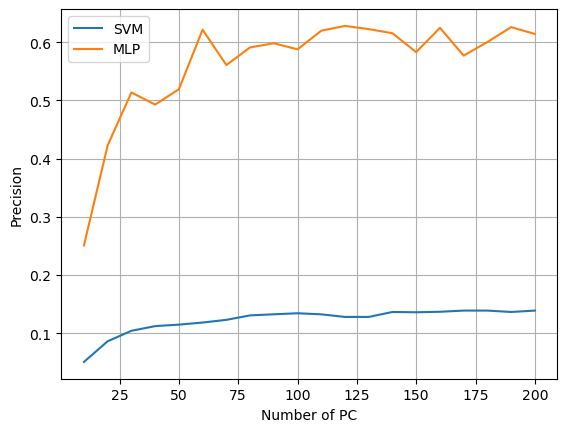

In [73]:
plt.plot(n_components, svm_results[:, 0], label='SVM')
plt.plot(n_components, mlp_results[:, 0], label='MLP')

plt.xlabel('Number of PC')
plt.ylabel('Precision')

plt.grid(True)
plt.legend()
plt.show()

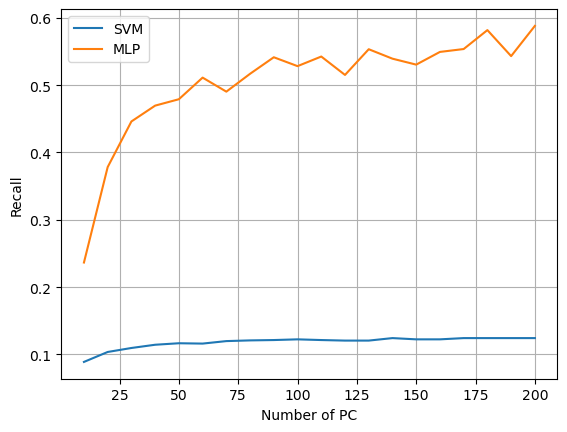

In [74]:
plt.plot(n_components, svm_results[:, 1], label='SVM')
plt.plot(n_components, mlp_results[:, 1], label='MLP')

plt.xlabel('Number of PC')
plt.ylabel('Recall')

# Show plot
plt.grid(True)
plt.legend()
plt.show()

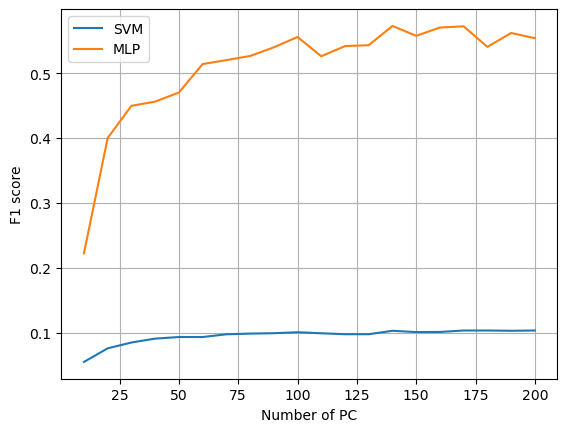

In [75]:
plt.plot(n_components, svm_results[:, 2], label='SVM')
plt.plot(n_components, mlp_results[:, 2], label='MLP')

plt.xlabel('Number of PC')
plt.ylabel('F1 score')

# Show plot
plt.grid(True)
plt.legend()
plt.show()

COMMENT:
Być może parametry są nieodpowiednio dobrane (miałem dziwny problem z jądrem "rbf" - funkcja fit_transform rzucała wewnętrzny LinAlgError), ale KernelPCA nie pomogło z przekształceniem cech w taki sposób bo poprawić performance klasyfikatorów. Prawdopodobnie przestrzeń przekształciła się w jeszcze dziwniejszą. Poza tym już w wcześniejszym SVM używałem jądra rbf. Być może zaaplikowanie go dwukrotnie coś psuje.